In [1]:
import sys
import pickle
import scipy.io as sio
import numpy as np
from keras.optimizers import SGD
from keras.utils import np_utils
import matplotlib.pyplot as plt

Using TensorFlow backend.
/Users/dwright/anaconda2/envs/aind/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
sys.path.insert(0,'/Users/dwright/dev/zoo/machine_augmented_classification/experiments/dissolving/mutitask/snhunters')
from multitask_experiment import MultitaskDEC

/Users/dwright/anaconda2/envs/aind/lib/python3.6/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [3]:
from sklearn.metrics import f1_score

## Clean labels

In [4]:
data = sio.loadmat('/Users/dwright/dev/zoo/machine_augmented_classification/data/snhunters/3pi_20x20_skew2_signPreserveNorm.mat')
x_valid  = data['testX']
y_valid  = np.squeeze(data['testy'])
x_train  = data['X']
y_train  = np.squeeze(data['y'])
print(x_train.shape, x_valid.shape)

(6916, 400) (2303, 400)


In [5]:
lcolours = ['#D6FF79', '#B0FF92', '#A09BE7', '#5F00BA', '#56CBF9', \
            '#F3C969', '#ED254E', '#CAA8F5', '#D9F0FF', '#46351D']

# DEC constants from DEC paper
batch_size = 256
lr         = 0.01
momentum   = 0.9
tol        = 0.001
maxiter    = 3e2
#update_interval = 140 #perhaps this should be 1 for multitask learning
update_interval = 10 #perhaps this should be 1 for multitask learning
n_clusters = 10 # number of clusters to use
n_classes  = 2  # number of classes

In [6]:
# load the pretrained DEC model for Supernova Hunters
ae_weights  = '/Users/dwright/dev/zoo/machine_augmented_classification/DEC-keras/results/snh/ae_weights_snh.h5'
dec_weights = '/Users/dwright/dev/zoo/machine_augmented_classification/DEC-keras/results/snh/10/DEC_model_final.h5'

In [6]:
dec = MultitaskDEC(dims=[x_valid.shape[-1], 500, 500, 2000, 10], \
                   n_clusters=n_clusters, batch_size=batch_size)
dec.initialize_model(optimizer=SGD(lr=lr, momentum=momentum),
                     ae_weights=ae_weights,
                     x=x_train)
dec.model.load_weights(dec_weights)

In [7]:
y_pred, metrics_dict = dec.clustering(x_train, np_utils.to_categorical(y_train), \
                                      (x_valid, np_utils.to_categorical(y_valid)), \
                                      pretrained_weights=dec_weights, maxiter=100)

Update interval 10
Save interval 135.078125
0 117 0 1.0
1 328 0 0.6951219512195121
2 710 0 0.7056338028169014
3 1069 0 0.7034611786716558
4 365 0 0.5726027397260274
5 1673 0 0.5630603705917513
6 1460 0 0.7904109589041096
7 690 0 0.5811594202898551
8 2 0 1.0
9 502 0 0.603585657370518
[0. 1.] [0]
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
5
[0.00860719 0.31423348 0.95513695 ... 0.33967993 0.9369725  0.00969982]
Iter 0  :1% fpr 0.99003 , F1= 0.28857 h= 0.03865 ; loss= [0 0 0] ;
	 valid 1% fpr=, 0.99217 , valid F1= 0.26258 h_valid= 0.0398 ; valid_loss=, [2.0816  1.77795 0.0681  0.30365]
saving model:  [inf, inf, inf]  ->  [2.0816  1.77795 0.0681  0.30365]
1.0 0.0
saving model to: ./results/dec/DEC_model_0.h5
0.99 0.00999999
0.98 0.01999998
0.97 0.029999971
0.96 0.04000002
0.95 0.050000012
0.94 0.060000002
0.93 0.06999999
0.92 0.07999998
0.91 0.089999974
[3.1100742e-03 2.0809978e-01 1.9887183e-03 ... 2.4884775e-01 4.2272243e-01
 3.6123150e-05]
Iter 10  :1% fpr 0.65626 , F1= 0.8691 h= 0.12324 ; loss= [0

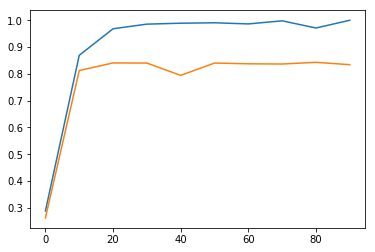

In [12]:
plt.plot(metrics_dict['iteration'], metrics_dict['train_f1'])
plt.plot(metrics_dict['iteration'], metrics_dict['valid_f1'])
plt.show()

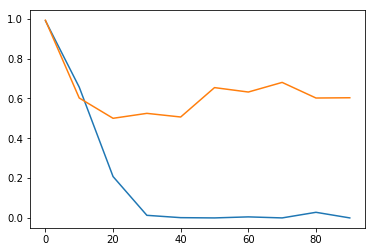

In [14]:
plt.plot(metrics_dict['iteration'], metrics_dict['train_fom'])
plt.plot(metrics_dict['iteration'], metrics_dict['valid_fom'])
plt.show()

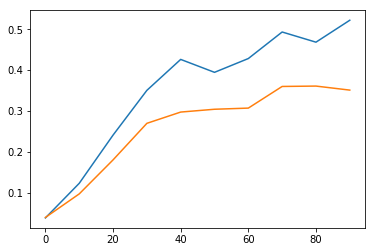

In [16]:
plt.plot(metrics_dict['iteration'], metrics_dict['train_h'])
plt.plot(metrics_dict['iteration'], metrics_dict['valid_h'])
plt.show()

## First Vote Only

In [7]:
data = sio.loadmat('/Users/dwright/dev/zoo/machine_augmented_classification/data/snhunters/3pi_20x20_skew2_signPreserveNorm_volunteer_votes_first_only.mat')
y_train  = np.squeeze(data['y']) == 'Yes'                                                                                       
#y_valid  = np.squeeze(data['y_test']) == 'Yes'                                                                                   
data = sio.loadmat('/Users/dwright/dev/zoo/machine_augmented_classification/data/snhunters/3pi_20x20_skew2_signPreserveNorm.mat')
x_train = data['X']
x_valid = data['testX']
y_valid = np.squeeze(data['testy'])

In [8]:
dec = MultitaskDEC(dims=[x_valid.shape[-1], 500, 500, 2000, 10], \
                   n_clusters=n_clusters, batch_size=batch_size)
dec.initialize_model(optimizer=SGD(lr=lr, momentum=momentum),
                     ae_weights=ae_weights,
                     x=x_train)
dec.model.load_weights(dec_weights)

In [9]:
y_pred, metrics_dict = dec.clustering(x_train, np_utils.to_categorical(y_train), \
                                      (x_valid, np_utils.to_categorical(y_valid)), \
                                      pretrained_weights=dec_weights, maxiter=100)

Update interval 10
Save interval 135.078125
0 117 0 0.8888888888888888
1 328 0 0.698170731707317
2 710 0 0.6985915492957746
3 1069 0 0.6744621141253508
4 365 0 0.6520547945205479
5 1673 0 0.5750149432157801
6 1460 0 0.7773972602739726
7 690 0 0.636231884057971
8 2 0 1.0
9 502 0 0.6414342629482072
[0. 1.] [0]
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
5
[0.00860719 0.31423348 0.95513695 ... 0.33967993 0.9369725  0.00969982]
Iter 0  :1% fpr 0.99295 , F1= 0.28986 h= 0.02159 ; loss= [0 0 0] ;
	 valid 1% fpr=, 0.99217 , valid F1= 0.26258 h_valid= 0.0398 ; valid_loss=, [2.0816  1.77795 0.0681  0.30365]
saving model:  [inf, inf, inf]  ->  [2.0816  1.77795 0.0681  0.30365]
1.0 0.0
saving model to: ./results/dec/DEC_model_0.h5
0.99 0.00999999
0.98 0.01999998
0.97 0.029999971
0.96 0.04000002
0.95 0.050000012
0.94 0.060000002
0.93 0.06999999
0.92 0.07999998
0.91 0.089999974
[0.11004239 0.16899687 0.03698198 ... 0.09780717 0.23672287 0.00198578]
Iter 10  :1% fpr 0.93034 , F1= 0.44689 h= 0.07863 ; loss= [0.632

In [10]:
data = sio.loadmat('/Users/dwright/dev/zoo/machine_augmented_classification/data/snhunters/3pi_20x20_skew2_signPreserveNorm_volunteer_votes_first_only.mat')
human_f1_benchmark = f1_score(y_valid, np.squeeze(data['y_test']) == 'Yes')
print(human_f1_benchmark)

0.7223326706428097


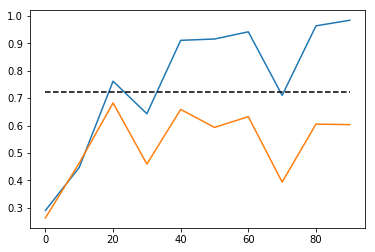

In [11]:
plt.plot(metrics_dict['iteration'], metrics_dict['train_f1'])
plt.plot(metrics_dict['iteration'], metrics_dict['valid_f1'])
plt.plot(metrics_dict['iteration'], human_f1_benchmark*np.ones(np.array(metrics_dict['iteration']).shape), 'k--')
plt.show()

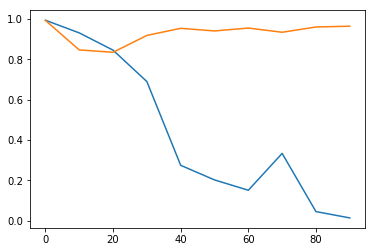

In [12]:
plt.plot(metrics_dict['iteration'], metrics_dict['train_fom'])
plt.plot(metrics_dict['iteration'], metrics_dict['valid_fom'])
plt.show()

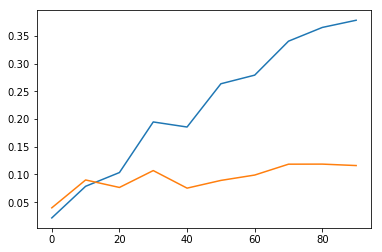

In [13]:
plt.plot(metrics_dict['iteration'], metrics_dict['train_h'])
plt.plot(metrics_dict['iteration'], metrics_dict['valid_h'])
plt.show()

## Vote Fraction Analysis

In [7]:
vote_fraction_dict = pickle.load(open('/Users/dwright/dev/zoo/data/supernova-hunters-vote-fraction-dict.pkl', 'rb'))

In [8]:
train_files = []
for f in data['train_files']:
  train_files.append(f.strip().replace('.fits',''))
print(train_files[0])
#train_files = set(train_files)
print(list(set([i for i in train_files if train_files.count(i)>1])))

1170747061421652300_56452.478_26471976_55_diff
['1001246931044034000_56559.515_28603056_68_diff', '1001246931044034000_56559.503_28601931_52_diff', '1001246931044034000_56559.540_28606628_57_diff', '1001246931044034000_56559.527_28604731_58_diff']


In [9]:
valid_files = []
for f in data['test_files']:
  valid_files.append(f.strip().replace('.fits',''))
print(valid_files[0])
#train_files = set(train_files)
print(list(set([i for i in valid_files if valid_files.count(i)>1])))

1140125671321051200_56734.594_31357137_58_diff
['1013335101303600300_56578.525_28830506_29_diff', '1001246931044034000_56569.512_28729009_121_diff', '1013335101303600300_56578.536_28832078_27_diff', '1001246931044034000_56569.500_28727063_116_diff']


In [10]:
vote_fractions_train = []
vote_fractions_valid = []
seen = []
for diff in train_files:
  vote_fractions_train.append(vote_fraction_dict[diff])
  seen.append(diff)
for diff in valid_files:
  vote_fractions_valid.append(vote_fraction_dict[diff])
print(vote_fractions_train[0])
print(vote_fractions_valid[0])
vote_fractions_train = np.array(vote_fractions_train)
vote_fractions_valid = np.array(vote_fractions_valid)

0.03125
0.6190476190476191


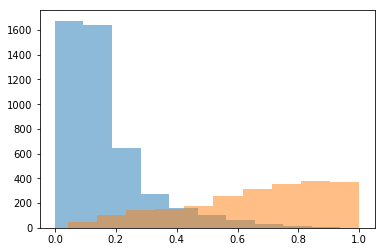

In [11]:
bins = [x for x in np.arange(0,1.04,0.04)]
plt.hist(vote_fractions_train[np.where(y_train==0)], alpha=0.5)
plt.hist(vote_fractions_train[np.where(y_train==1)], alpha=0.5)
plt.show()

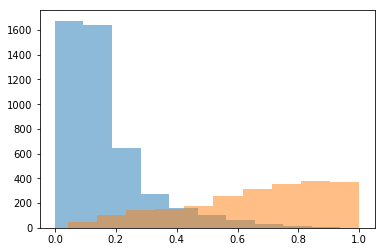

In [12]:
data = sio.loadmat('/Users/dwright/dev/zoo/machine_augmented_classification/data/snhunters/3pi_20x20_skew2_signPreserveNorm.mat')
y_train_true = np.squeeze(data['y'])
bins = [x for x in np.arange(0,1.04,0.04)]
plt.hist(vote_fractions_train[np.where(y_train_true==0)], alpha=0.5)
plt.hist(vote_fractions_train[np.where(y_train_true==1)], alpha=0.5)
plt.show()

In [13]:
y_train_vote_fractions = vote_fractions_train > 0.5
y_valid_vote_fractions = vote_fractions_valid > 0.5

In [14]:
f1_score(y_valid, y_valid_vote_fractions)

0.8133333333333332

In [15]:
dec = MultitaskDEC(dims=[x_valid.shape[-1], 500, 500, 2000, 10], \
                   n_clusters=n_clusters, batch_size=batch_size)
dec.initialize_model(optimizer=SGD(lr=lr, momentum=momentum),
                     ae_weights=ae_weights,
                     x=x_train)
dec.model.load_weights(dec_weights)

In [16]:
y_pred, metrics_dict = dec.clustering(x_train, np_utils.to_categorical(y_train_vote_fractions), \
                                      (x_valid, np_utils.to_categorical(y_valid)), \
                                      pretrained_weights=dec_weights, maxiter=100)

Update interval 10
Save interval 135.078125
0 117 0 1.0
1 328 0 0.7652439024390244
2 710 0 0.7507042253521127
3 1069 0 0.7567820392890552
4 365 0 0.6876712328767123
5 1673 0 0.6210400478182905
6 1460 0 0.8397260273972603
7 690 0 0.6898550724637681
8 2 0 1.0
9 502 0 0.7071713147410359
[0. 1.] [0]
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
5
[0.00860719 0.31423348 0.95513695 ... 0.33967993 0.9369725  0.00969982]
Iter 0  :1% fpr 0.99408 , F1= 0.25623 h= 0.03551 ; loss= [0 0 0] ;
	 valid 1% fpr=, 0.99217 , valid F1= 0.26258 h_valid= 0.0398 ; valid_loss=, [2.0816  1.77795 0.0681  0.30365]
saving model:  [inf, inf, inf]  ->  [2.0816  1.77795 0.0681  0.30365]
1.0 0.0
saving model to: ./results/dec/DEC_model_0.h5
0.99 0.00999999
0.98 0.01999998
0.97 0.029999971
0.96 0.04000002
0.95 0.050000012
0.94 0.060000002
0.93 0.06999999
0.92 0.07999998
0.91 0.089999974
[5.5909908e-04 3.5733005e-03 1.0172845e-03 ... 6.0736467e-03 8.3540753e-02
 3.6429583e-06]
Iter 10  :1% fpr 0.86861 , F1= 0.14018 h= 0.094 ; loss= [0

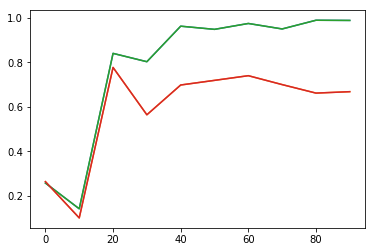

In [18]:
plt.plot(metrics_dict['iteration'], metrics_dict['train_f1'])
plt.plot(metrics_dict['iteration'], metrics_dict['valid_f1'])
plt.show()

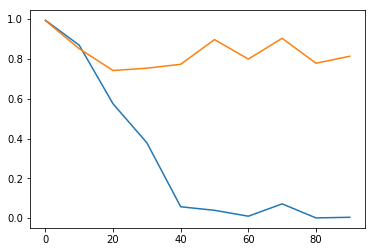

In [19]:
plt.plot(metrics_dict['iteration'], metrics_dict['train_fom'])
plt.plot(metrics_dict['iteration'], metrics_dict['valid_fom'])
plt.show()

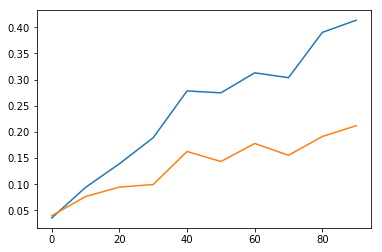

In [20]:
plt.plot(metrics_dict['iteration'], metrics_dict['train_h'])
plt.plot(metrics_dict['iteration'], metrics_dict['valid_h'])
plt.show()